# CHN Hackathon Projects

This notebook is a template workspace for the week 1 group projects involving
the [Reproducible Brain Charts](https://reprobrainchart.github.io/) (RBC)
database. Herein, we demonstrate how to access the RBC data and demonstrate a
linear regression analysis on the dataset.

## Getting Started with RBC Data

To load in some of the RBC data, we'll use some tools already installed on the
HUB: `rbclib` and `pandas`.
The `rbclib` library allows us to access RBC data from the cloud; it is
demonstrated below.

The `pandas` library handles spreadsheet data (called `DataFrame`s in Python)
and can read tab-separated and comma-separated value files (`*.tsv` and
`*.csv` files).

In [308]:
# We will need the RBCPath type from the rbclib package to load data from the RBC.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

### Accessing the PNC Dataset

The RBC project contains many datasets; for this project, we will focus on
just one of these datasets: the
[Philadelphia Neurodevelopmental Cohort](
https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html)
(PNC). The PNC contains a lot of data, including raw MRI data. However, due to
the time constraints for this project, we suggest that teams focus on the
already processed data provided by the RBC, which is described below.

The RBC's data is stored in a combination of GitHub repositories and Amazon S3
buckets. The RBC GitHub repositories all belong to the organization
[`ReproBrainChart`](https://github.com/ReproBrainChart), and each contains a
subset of the data for one of the RBC datasets; for the PNC dataset, all
repositories names start with `PNC_`:

* `PNC_FreeSurfer`: structural data processed by FreeSurfer.
* `PNC_BIDS`: raw MRI scan data in the
  [Brain Imaging Data Structure](https://bids.neuroimaging.io/index.html)
  format.
* `PNC_CPAC`: processed functional MRI data.

One typically accesses the RBC using the [`datalad`](https://www.datalad.org/)
tool (see the [RBC page on accessing the data](
https://reprobrainchart.github.io/docs/get_data) for more information).
However, we will access the data using the `RBCPath` type that was imported in
the code-cell above (`from rbclib import RBCPath`). This type inherits from a
type called `CloudPath` (from the library [`cloudpathlib`](
https://cloudpathlib.drivendata.org/stable/)); it represents the path of a
file in the RBC dataset and can be used to access data in thecloud as if it
were local.

For example, the following cell creates an `RBCPath` to a subject's FreeSurfer
data directory then lists and prints the contents.

In [309]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


If we want to open and load one of these files, we can do so using the
`RBCPath.open` method. This method is like the `Path.open` method (from the
built-in Python library [`pathlib`](1)). For example, if we want to load this
subject's `regionsurfacestats.tsv` file, we can do so as follows.

[1]: https://docs.python.org/3/library/pathlib.html

In [310]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [311]:
pd.set_option('display.max_columns', None)
data

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,MeanCurv,GausCurv,FoldInd,CurvInd,Index,SegId,Mean_wgpct,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,0.122,0.027,18,1.6,2,2,25.8475,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,0.109,0.020,28,2.7,3,3,23.4921,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,0.125,0.032,49,5.2,4,5,15.9672,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,0.144,0.036,8,1.0,5,6,20.8874,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,0.130,0.028,57,4.5,6,7,20.8271,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,0.123,0.027,187,16.5,4,3,21.2075,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,0.127,0.029,165,15.6,5,4,22.2520,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,0.143,0.037,181,15.8,6,5,23.4655,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,0.135,0.031,308,26.0,7,6,22.2411,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


#### Some EDA for the Brain Scan Data

In [312]:
len(data['atlas'].unique())
data['atlas'].value_counts()

atlas
Schaefer2018_1000Parcels_7Networks_order     1002
Schaefer2018_1000Parcels_17Networks_order    1002
Schaefer2018_900Parcels_17Networks_order      902
Schaefer2018_900Parcels_7Networks_order       902
Schaefer2018_800Parcels_7Networks_order       802
Schaefer2018_800Parcels_17Networks_order      802
Schaefer2018_700Parcels_7Networks_order       702
Schaefer2018_700Parcels_17Networks_order      702
Slab                                          693
Schaefer2018_600Parcels_7Networks_order       602
Schaefer2018_600Parcels_17Networks_order      602
Schaefer2018_500Parcels_7Networks_order       502
Schaefer2018_500Parcels_17Networks_order      502
Schaefer2018_400Parcels_7Networks_order       402
Schaefer2018_400Parcels_17Networks_order      402
CC400                                         376
glasser                                       362
gordon333dil                                  335
Schaefer2018_300Parcels_17Networks_order      302
Schaefer2018_300Parcels_7Networks_order     

In [313]:
value_counts = data['StructName'].value_counts()
value_counts

StructName
Background+FreeSurfer_Defined_Medial_Wall    40
17Networks_RH_SalVentAttnB_IPL_1             10
17Networks_RH_SalVentAttnA_FrMed_1           10
17Networks_RH_LimbicB_OFC_1                  10
17Networks_RH_SalVentAttnA_Ins_1             10
                                             ..
region00736                                   1
region00738                                   1
region00739                                   1
region00740                                   1
region00746                                   1
Name: count, Length: 3927, dtype: int64

In [314]:
s1 = data[data['atlas'] == 'Schaefer2018_100Parcels_17Networks_order']
s1.head()

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,MeanCurv,GausCurv,FoldInd,CurvInd,Index,SegId,Mean_wgpct,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
3959,sub-1000393599,NaN,Schaefer2018_100Parcels_17Networks_order,lh,Background+FreeSurfer_Defined_Medial_Wall,9377,6146,2370,0.847,1.266,0.089,0.028,85,9.9,1,0,3.8815,10.4840,-60.4127,96.6036,157.0164,0.3702,2.4985,0.4165,1.6581,4.1347,2.4766
3960,sub-1000393599,NaN,Schaefer2018_100Parcels_17Networks_order,lh,17Networks_LH_VisCent_ExStr_1,2800,1826,4315,2.258,0.674,0.147,0.041,39,4.5,2,1,17.7788,5.3548,0.5998,34.7106,34.1108,3.3202,2.7257,0.1347,2.5275,3.0700,0.5426
3961,sub-1000393599,NaN,Schaefer2018_100Parcels_17Networks_order,lh,17Networks_LH_VisCent_ExStr_2,3863,2399,4909,1.935,0.574,0.130,0.035,50,5.1,3,2,17.1891,5.5936,-5.8710,48.8780,54.7490,3.0730,2.6997,0.1200,2.4369,3.0926,0.6558
3962,sub-1000393599,NaN,Schaefer2018_100Parcels_17Networks_order,lh,17Networks_LH_VisCent_Striate_1,3225,2007,3511,1.640,0.476,0.143,0.038,49,5.3,4,3,12.8692,6.0253,-5.7071,34.0127,39.7198,2.1359,2.5696,0.1312,2.3391,3.1383,0.7992
3963,sub-1000393599,NaN,Schaefer2018_100Parcels_17Networks_order,lh,17Networks_LH_VisCent_ExStr_3,4050,2544,5838,2.236,0.531,0.134,0.036,57,6.0,5,4,18.4264,6.1379,-9.0185,42.5846,51.6031,3.0021,3.1113,0.2107,2.5169,3.5437,1.0268


In [315]:
s1['StructName'].value_counts().index.tolist()

['Background+FreeSurfer_Defined_Medial_Wall',
 '17Networks_RH_SalVentAttnA_FrMed_1',
 '17Networks_RH_SalVentAttnA_ParMed_1',
 '17Networks_RH_SalVentAttnA_Ins_1',
 '17Networks_RH_SalVentAttnA_ParOper_1',
 '17Networks_RH_DorsAttnB_FEF_1',
 '17Networks_RH_DorsAttnB_PostC_2',
 '17Networks_RH_DorsAttnB_PostC_1',
 '17Networks_RH_DorsAttnA_SPL_1',
 '17Networks_RH_DorsAttnA_ParOcc_1',
 '17Networks_RH_DorsAttnA_TempOcc_1',
 '17Networks_RH_SomMotB_Cent_1',
 '17Networks_RH_SomMotB_S2_2',
 '17Networks_LH_VisCent_Striate_1',
 '17Networks_RH_SomMotB_Aud_1',
 '17Networks_RH_SomMotA_4',
 '17Networks_RH_SomMotA_3',
 '17Networks_RH_SomMotA_2',
 '17Networks_RH_SomMotA_1',
 '17Networks_RH_VisPeri_ExStrSup_1',
 '17Networks_RH_VisPeri_ExStrInf_1',
 '17Networks_RH_VisPeri_StriCal_1',
 '17Networks_RH_VisCent_ExStr_3',
 '17Networks_RH_VisCent_ExStr_2',
 '17Networks_RH_VisCent_ExStr_1',
 '17Networks_RH_SomMotB_S2_1',
 '17Networks_RH_TempPar_2',
 '17Networks_RH_TempPar_1',
 '17Networks_RH_DefaultC_PHC_1',
 '17Ne

### Getting the Participant Lists and Metadata

We have pre-sorted the participants in the PNC study into a training and a
test dataset. Basic metadata about each participant can be found in TSV files
in the `shared` directory in your home directory.

In [316]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN


## Project Goal: Predict the `p_factor`

### Step 1. Collect Data

#### Legacy Code

In [317]:
def load_ba1_surfarea(participant_id):
    """Loads and returns the bilateral Brodmann Area 1 surface area for a PNC
    study participant.
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    # Next, find the relevant rows:
    row_mask = (data['StructName'] == 'Brodmann.1')
    # Then extract and sum the surface areas:
    ba1_surfareas = data.loc[row_mask, 'SurfArea']
    ba1_surfarea = sum(ba1_surfareas)
    # And return this value:
    return ba1_surfarea

#### Helper Functions for Averaging Out Data in this DataFrame

In [336]:
networks_17 = [
    'SalVentAttnA',
    'SalVentAttnB',
    'DorsAttnA',
    'DorsAttnB',
    'SomMotA',
    'SomMotB',
    'VisCent',
    'VisPeri',
    'TempPar',
    'DefaultA',
    'DefaultB',
    'DefaultC',
    'ContA',
    'ContB',
    'ContC',
    'LimbicA',
    'LimbicB'
]

scaf_sections_100 = ['Background+FreeSurfer_Defined_Medial_Wall',
 '17Networks_RH_SalVentAttnA_FrMed_1',
 '17Networks_RH_SalVentAttnA_ParMed_1',
 '17Networks_RH_SalVentAttnA_Ins_1',
 '17Networks_RH_SalVentAttnA_ParOper_1',
 '17Networks_RH_DorsAttnB_FEF_1',
 '17Networks_RH_DorsAttnB_PostC_2',
 '17Networks_RH_DorsAttnB_PostC_1',
 '17Networks_RH_DorsAttnA_SPL_1',
 '17Networks_RH_DorsAttnA_ParOcc_1',
 '17Networks_RH_DorsAttnA_TempOcc_1',
 '17Networks_RH_SomMotB_Cent_1',
 '17Networks_RH_SomMotB_S2_2',
 '17Networks_LH_VisCent_Striate_1',
 '17Networks_RH_SomMotB_Aud_1',
 '17Networks_RH_SomMotA_4',
 '17Networks_RH_SomMotA_3',
 '17Networks_RH_SomMotA_2',
 '17Networks_RH_SomMotA_1',
 '17Networks_RH_VisPeri_ExStrSup_1',
 '17Networks_RH_VisPeri_ExStrInf_1',
 '17Networks_RH_VisPeri_StriCal_1',
 '17Networks_RH_VisCent_ExStr_3',
 '17Networks_RH_VisCent_ExStr_2',
 '17Networks_RH_VisCent_ExStr_1',
 '17Networks_RH_SomMotB_S2_1',
 '17Networks_RH_TempPar_2',
 '17Networks_RH_TempPar_1',
 '17Networks_RH_DefaultC_PHC_1',
 '17Networks_RH_DefaultC_Rsp_1',
 '17Networks_RH_DefaultB_PFCv_2',
 '17Networks_RH_DefaultB_PFCv_1',
 '17Networks_RH_DefaultB_PFCd_1',
 '17Networks_LH_VisCent_ExStr_1',
 '17Networks_RH_DefaultA_pCunPCC_1',
 '17Networks_RH_DefaultA_PFCd_1',
 '17Networks_RH_DefaultA_IPL_1',
 '17Networks_RH_SalVentAttnB_IPL_1',
 '17Networks_RH_ContC_Cingp_1',
 '17Networks_RH_ContB_PFClv_1',
 '17Networks_RH_ContB_PFCld_1',
 '17Networks_RH_ContB_IPL_1',
 '17Networks_RH_ContB_Temp_1',
 '17Networks_RH_ContA_PFCl_2',
 '17Networks_RH_ContA_PFCl_1',
 '17Networks_RH_ContA_IPS_1',
 '17Networks_RH_LimbicA_TempPole_1',
 '17Networks_RH_LimbicB_OFC_1',
 '17Networks_RH_SalVentAttnB_PFCmp_1',
 '17Networks_RH_SalVentAttnB_PFCl_1',
 '17Networks_RH_ContC_pCun_1',
 '17Networks_LH_SalVentAttnA_ParMed_1',
 '17Networks_LH_SalVentAttnA_Ins_2',
 '17Networks_LH_SalVentAttnA_Ins_1',
 '17Networks_LH_SalVentAttnA_ParOper_1',
 '17Networks_LH_DorsAttnB_FEF_1',
 '17Networks_LH_DorsAttnB_PostC_3',
 '17Networks_LH_DorsAttnB_PostC_2',
 '17Networks_LH_DorsAttnB_PostC_1',
 '17Networks_LH_DorsAttnA_SPL_1',
 '17Networks_LH_DorsAttnA_ParOcc_1',
 '17Networks_LH_DorsAttnA_TempOcc_1',
 '17Networks_LH_TempPar_1',
 '17Networks_LH_VisCent_ExStr_2',
 '17Networks_LH_SomMotB_S2_1',
 '17Networks_LH_SomMotB_Aud_1',
 '17Networks_LH_SomMotA_2',
 '17Networks_LH_SomMotA_1',
 '17Networks_LH_VisPeri_ExStrSup_1',
 '17Networks_LH_VisPeri_StriCal_1',
 '17Networks_LH_VisPeri_ExStrInf_1',
 '17Networks_RH_TempPar_3',
 '17Networks_LH_SomMotB_S2_2',
 '17Networks_RH_DefaultA_PFCm_1',
 '17Networks_LH_VisCent_ExStr_3',
 '17Networks_LH_SomMotB_Cent_1',
 '17Networks_LH_DefaultC_PHC_1',
 '17Networks_LH_DefaultC_Rsp_1',
 '17Networks_LH_DefaultB_PFCv_2',
 '17Networks_LH_DefaultB_PFCv_1',
 '17Networks_LH_DefaultB_PFCl_1',
 '17Networks_LH_DefaultB_PFCd_1',
 '17Networks_LH_DefaultB_IPL_1',
 '17Networks_LH_DefaultB_Temp_2',
 '17Networks_LH_DefaultB_Temp_1',
 '17Networks_LH_DefaultA_PFCm_1',
 '17Networks_LH_DefaultA_pCunPCC_1',
 '17Networks_LH_SalVentAttnA_FrMed_1',
 '17Networks_LH_ContC_Cingp_1',
 '17Networks_LH_ContC_pCun_2',
 '17Networks_LH_ContC_pCun_1',
 '17Networks_LH_ContB_PFClv_1',
 '17Networks_LH_ContA_PFCl_2',
 '17Networks_LH_ContA_PFCl_1',
 '17Networks_LH_ContA_IPS_1',
 '17Networks_LH_LimbicA_TempPole_2',
 '17Networks_LH_LimbicA_TempPole_1',
 '17Networks_LH_LimbicB_OFC_1',
 '17Networks_LH_SalVentAttnB_PFCmp_1',
 '17Networks_LH_SalVentAttnB_PFCl_1',
 '17Networks_LH_DefaultA_PFCd_1']

columns = [
    'NumVert',
    'SurfArea',
    'GrayVol',
    'ThickAvg',
    'ThickStd',
    'MeanCurv',
    'GausCurv',
    'FoldInd',
    'CurvInd',
    'Mean_wgpct',
    'StdDev_wgpct',
    'Min_wgpct',
    'Max_wgpct',
    'Range_wgpct',
    'SNR_wgpct',
    'Mean_piallgi',
    'StdDev_piallgi',
    'Min_piallgi',
    'Max_piallgi',
    'Range_piallgi'
]

def get_avgd_out_cols():
    ans = []
    for net_17 in networks_17:
        for col in columns:
            ans.append(net_17 + ":" + col)
    return ans

def get_all_cols():
    ans = []
    for section in scaf_sections_100:
        for col in columns:
            ans.append(section + ":" + col)
    return ans


def get_avgd_out_vars():
    ans = {
        'participant_id': [],
        'p_factor': []
    }

    for col in get_avgd_out_cols():
        ans[col] = []
        
    return ans

def get_all_vars():
    ans = {
        'participant_id': [],
        'p_factor': []
    }

    for col in get_all_cols():
        ans[col] = []
        
    return ans

In [337]:
def get_network(region_label):
    """
    Extract the functional network from a region label.
    
    Parameters:
    -----------
    region_label : str
        Region label in format '17Networks_LH/RH_NetworkName_AnatomicalRegion_N'
        
    Returns:
    --------
    str or None
        Network name (e.g., 'SalVentAttnA', 'DefaultB') or None if not a network region
    """
    if region_label == 'Background+FreeSurfer_Defined_Medial_Wall':
        return None
    
    # Split by underscore and get the network component
    parts = region_label.split('_')
    if len(parts) >= 3:
        return parts[2]  # Network is the 3rd component (index 2)
    
    return None

#### Helper Functions

The RBC datasets include a variable for each subject called the `p_factor`.
This factor is intended to capture overall psychopathology and is discussed at
length in RBC publications. The goal for this project is to train a
machine-learning tool to predict the `p_factor` of each participant in the
test dataset by using data from the participants in the training dataset.
Note that the `p_factor` column in the training dataset is provided, but the
`p_factor` column in the test dataset has been set to `NaN`.

Your specific task is to calculate predicted `p_factor` values, to insert
these values into the `'p_factor'` column of the provided `test_data`
dataframe, to save `test_data` to disk using the `test_data.to_csv` method
(example below), then finally to commit and push the file to your group's
GitHub repository.

We will look over the results of the group mini-projects together once
everyone has submitted their predictions.

**In this section, we demonstrate an example approach to predicting the
`p_factor` using one of the most straightforward supervised techniques in
machine learning: linear regression.** Suppose we suspected that the size of
Brodmann Area 1 was predictive of the `p_factor` in individual participants
and thus wanted to run a linear regression analysis to predict `p_factor` in
the test participants based on the relationship in the training participants.
Performing linear regression will require a few steps, which are likely to be
similar in your projects:

1. Collect the relevant data (the surface areas of BA1) into a dataframe.
2. Train the linear regression model using the training participants.
3. Use the trained model to predict the `p_factor` of the test subjects.
4. Export and commit our predictions.

The data we need to make the predictions are, for each participant, (1) the
surface area of BA1, and (2) the `p_factor`. We can collect these into a
dataframe using `pandas` and the `RBCPath` type (to load the data).

The surface area of BA1 can be found in the FreeSurfer TSV files examined
earlier in this notebook. We'll start by writing a function that loads the
appropriate TSV for for a given participant.

In order to speed up the loading of data during the project, we can specify
a `local_cache_dir` where any data downloaded using the function will be
automatically saved; the next time you load the same data, it will be loaded
from local storage instead of from S3 (local storage is much faster). The
function here uses the directory `cache` in your home directory by default,
but you can change this if you prefer a different directory. The directory
will be automatically created for you if it does not exist.

In [338]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

We can run this function to obtain a subject's FreeSurfer dataframe. This
dataframe contains information about various anatomical atlases that segment
the cortical surface into distinct regions. Notice that the `atlas` column of
the dataframe contains the name of distinct atlases while the `StructName`
column contains the name of the ROI described. The `SurfArea` column gives the
surface area of each ROI.

In [339]:
example_participant_id = 1000393599
data = load_fsdata(example_participant_id)

# Display the dataframe we loaded:
#data

To extract the surface area of BA1, we need to look for rows whose
`StructName` indicates that it represents BA1. In the RBC database, the name
`'Brodmann.1'` is used to represent Brodmann Area 1. We can select only the
rows of interest using this name.

In [340]:
row_mask = (data['StructName'] == 'Brodmann.1')
data[row_mask]

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,MeanCurv,GausCurv,FoldInd,CurvInd,Index,SegId,Mean_wgpct,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
1876,sub-1000393599,NaN,PALS_B12_Brodmann,lh,Brodmann.1,2851,1753,4067,2.069,0.576,0.125,0.030,35,3.6,7,8,16.3607,5.2783,-7.2181,32.3884,39.6064,3.0996,3.4915,0.6993,2.4164,5.3746,2.9581
1919,sub-1000393599,NaN,PALS_B12_Brodmann,rh,Brodmann.1,2379,1537,3766,2.008,0.586,0.139,0.034,36,3.5,7,9,16.0834,4.8646,-6.7201,38.8376,45.5577,3.3062,3.2389,0.5011,2.4060,4.8009,2.3949


Given these rows, we can extract the BA1 surface areas and sum them (we will
perform the linear regression on the bilateral BA1 surface area by adding the
left and right hemisphere surface areas).

In [341]:
ba1_surfareas = data.loc[row_mask, 'SurfArea']
ba1_surfarea = sum(ba1_surfareas)

# Show the bilateral surface area for this participant (in square mm):
ba1_surfarea

3290

The below function gets an average for all the values in each of the 17 networks, returning the mean value for each
numeric category for each of the 17 networks in the brain.

In [342]:
def get_avgd_out_data(data):
    ans = {
        
    }
    
    s1 = data[data['atlas'] == 'Schaefer2018_100Parcels_17Networks_order'].copy()
    s1['network'] = s1['StructName'].apply(get_network)
    for nt in networks_17:
        means = s1[s1['network'] == nt].mean(numeric_only=True)
        for col in columns:
            ans[nt + ":" + col] = means.loc[col]

    return ans

def load_avgd_out_data(participant_id):
    data = load_fsdata(participant_id)
    return get_avgd_out_data(data)

In [343]:
def get_all_data(data):
    ans = {
        
    }
    
    s1 = data[data['atlas'] == 'Schaefer2018_100Parcels_17Networks_order']
    for sec in scaf_sections_100:
        row = s1[s1['StructName'] == sec].iloc[0]
        for col in columns:
            ans[sec + ":" + col] = row.loc[col]

    return ans

def load_all_data(participant_id):
    data = load_fsdata(participant_id)
    return get_all_data(data)

In [344]:
load_all_data(example_participant_id)

{'Background+FreeSurfer_Defined_Medial_Wall:NumVert': 9377,
 'Background+FreeSurfer_Defined_Medial_Wall:SurfArea': 6146,
 'Background+FreeSurfer_Defined_Medial_Wall:GrayVol': 2370,
 'Background+FreeSurfer_Defined_Medial_Wall:ThickAvg': 0.847,
 'Background+FreeSurfer_Defined_Medial_Wall:ThickStd': 1.266,
 'Background+FreeSurfer_Defined_Medial_Wall:MeanCurv': 0.089,
 'Background+FreeSurfer_Defined_Medial_Wall:GausCurv': 0.028,
 'Background+FreeSurfer_Defined_Medial_Wall:FoldInd': 85,
 'Background+FreeSurfer_Defined_Medial_Wall:CurvInd': 9.9,
 'Background+FreeSurfer_Defined_Medial_Wall:Mean_wgpct': 3.8815,
 'Background+FreeSurfer_Defined_Medial_Wall:StdDev_wgpct': 10.484,
 'Background+FreeSurfer_Defined_Medial_Wall:Min_wgpct': -60.4127,
 'Background+FreeSurfer_Defined_Medial_Wall:Max_wgpct': 96.6036,
 'Background+FreeSurfer_Defined_Medial_Wall:Range_wgpct': 157.0164,
 'Background+FreeSurfer_Defined_Medial_Wall:SNR_wgpct': 0.3702,
 'Background+FreeSurfer_Defined_Medial_Wall:Mean_piallgi': 

Now that we have code written to extract data from a single subject, we can
gather the BA1 data for our training and test subjects into a single
dataframe. Doing so will require downloading all of the TSV files for all of
the subjects in the training dataset. This will take some time, but probably
less than an hour.

In [345]:
no_data = [1342487188,
 1649551035,
 2003542642,
 219325366,
 2249226316,
 4184549693,
 495793681,
 4205323727,
 533698126]


#### Load all surface Areas, collect Data

In [346]:
# First load in surface area data for each participant:
print("Loading surface areas...")     

# We will put the rows in this dictionary of lists as we build the dataframe:
all_vars = get_all_vars()

# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(all_data))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in all_data.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = row['participant_id']
    p_factor = row['p_factor']
    # Load the surface area for this participant:

    if participant_id in no_data:
        continue
        
    try:
        surf_area = load_all_data(participant_id)
    except FileNotFoundError:
        # Some subjects are just missing the file, so we code them as NaN.
        surf_area = np.nan
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    for col in get_all_cols():
        all_vars[col].append(surf_area[col])
    all_vars['p_factor'].append(p_factor)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column
train_vars = all_vars[~np.isnan(all_vars['p_factor'])]
test_vars = all_vars[np.isnan(all_vars['p_factor'])]

# Display the finished dataframe.
all_vars

Loading surface areas...


IntProgress(value=0, max=1601)

IndexError: single positional indexer is out-of-bounds

In [ ]:
all_vars.to_csv("all_full_data.csv")
train_vars.to_csv("training_full_data.csv")

In [119]:
#After that, group the data by the P-Factor Value, so I can average them, and then do PCA on the averaged out data
#max is 2.56, min is -1.61, exponentially distributed

high_p_value_data = train_vars[train_vars['p_factor'] > 1.5]
low_p_value_data = train_vars[train_vars['p_factor'] < 1.5]

#### EDA on this dataset I made

In [4]:
all_vars = pd.read_csv('all_data.csv')
train_vars = pd.read_csv('training_data.csv')

In [5]:
columns = [
    'NumVert',
    'SurfArea',
    'GrayVol',
    'ThickAvg',
    'ThickStd',
    'MeanCurv',
    'GausCurv',
    'FoldInd',
    'CurvInd',
    'Index',
    'SegId',
    'Mean_wgpct',
    'StdDev_wgpct',
    'Min_wgpct',
    'Max_wgpct',
    'Range_wgpct',
    'SNR_wgpct',
    'Mean_piallgi',
    'StdDev_piallgi',
    'Min_piallgi',
    'Max_piallgi',
    'Range_piallgi'
]

def get_col_from_combined_name(st):
    return st.split(":")[1]


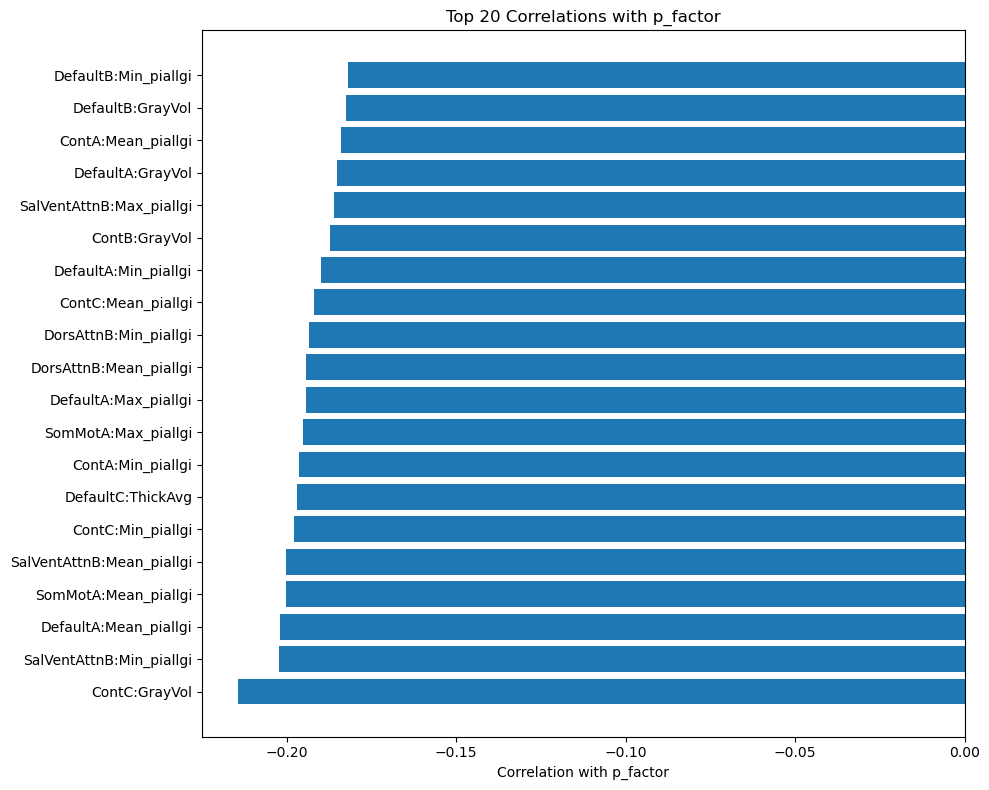

In [305]:
## See which values are the most correlated with p factor
# Calculate correlations with p_factor
import matplotlib.pyplot as plt
import seaborn as sns

correlations = all_vars.corr()['p_factor'].drop('p_factor')  # Drop self-correlation
sorted_corr = correlations.abs().sort_values(ascending=False)

# Plot top 20 correlations
top_n = 20
top_corr = correlations[sorted_corr.index[:top_n]]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation with p_factor')
plt.title(f'Top {top_n} Correlations with p_factor')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [306]:
top_corr_list = top_corr.index.tolist()
top_corr_list

['ContC:GrayVol',
 'SalVentAttnB:Min_piallgi',
 'DefaultA:Mean_piallgi',
 'SomMotA:Mean_piallgi',
 'SalVentAttnB:Mean_piallgi',
 'ContC:Min_piallgi',
 'DefaultC:ThickAvg',
 'ContA:Min_piallgi',
 'SomMotA:Max_piallgi',
 'DefaultA:Max_piallgi',
 'DorsAttnB:Mean_piallgi',
 'DorsAttnB:Min_piallgi',
 'ContC:Mean_piallgi',
 'DefaultA:Min_piallgi',
 'ContB:GrayVol',
 'SalVentAttnB:Max_piallgi',
 'DefaultA:GrayVol',
 'ContA:Mean_piallgi',
 'DefaultB:GrayVol',
 'DefaultB:Min_piallgi']

In [240]:
train_vars = train_vars[~train_vars.isnull().any(axis=1)]
train_vars.head()


,Unnamed: 0,participant_id,p_factor,SalVentAttnA:NumVert,SalVentAttnA:SurfArea,SalVentAttnA:GrayVol,SalVentAttnA:ThickAvg,SalVentAttnA:ThickStd,SalVentAttnA:MeanCurv,SalVentAttnA:GausCurv,...,LimbicB:StdDev_wgpct,LimbicB:Min_wgpct,LimbicB:Max_wgpct,LimbicB:Range_wgpct,LimbicB:SNR_wgpct,LimbicB:Mean_piallgi,LimbicB:StdDev_piallgi,LimbicB:Min_piallgi,LimbicB:Max_piallgi,LimbicB:Range_piallgi
0,0,1000393599,0.589907,2041.111111,1386.111111,4319.111111,2.898000,0.570000,0.120667,0.028444,...,7.74245,-22.32300,66.62070,88.94370,2.93995,2.37700,0.21500,2.01445,3.24485,1.23045
1,1,1001970838,-0.659061,2084.555556,1400.222222,4306.666667,2.813778,0.548000,0.121222,0.027333,...,8.06155,-24.73265,45.93910,70.67170,2.83385,2.24240,0.14335,1.99275,2.77450,0.78175
2,2,1007995238,-1.608375,1796.444444,1215.222222,3958.777778,2.923556,0.540000,0.117333,0.027444,...,7.96870,-20.56425,43.45190,64.01615,2.63275,2.36035,0.22210,2.10490,3.47415,1.36930
3,3,1011497669,-1.233807,1875.111111,1279.888889,4144.888889,2.902889,0.538000,0.117000,0.025778,...,7.98535,-28.95260,63.10885,92.06145,2.84495,2.30610,0.13520,2.10565,2.82025,0.71455
4,4,1017092387,-0.923100,1877.777778,1286.666667,4043.666667,2.813889,0.601556,0.117333,0.026556,...,7.30910,-21.02140,51.15490,72.17630,2.82865,2.21660,0.14775,2.00750,2.80105,0.79355


### Step 2. Measure the Feature Selection by Testing it on Itself

In [301]:
# So let's try linear regression, just to see what happens
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import random

#Normalize everything first
z_scaled = train_vars.copy()
random_state = random.randint(1, 10000)

for column in z_scaled.columns:
    z_scaled[column] = (z_scaled[column] - z_scaled[column].mean()) / z_scaled[column].std() if z_scaled[column].std() > 0 else 0

# z_scaled = z_scaled[["p_factor", "participant_id"] + top_corr_list]
y = z_scaled["p_factor"]
X = z_scaled.drop(['participant_id', 'p_factor'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(X_train.shape)
print(X_test.shape)

# Train the regression using the training matrix:
lreg = LinearRegression()
rfr = RandomForestRegressor(n_estimators=50)
lasso = Lasso(alpha=0.05)
# rfr.fit(X_train, y_train)
lreg.fit(X_train, y_train)
lasso.fit(X_train, y_train)

(837, 375)
(210, 375)


Lasso(alpha=0.05)

In [302]:
y_pred = lasso.predict(X_test)

In [303]:
# get a correlation between predictions and Y_test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Explained_variance: {explained_variance}")

Mean Absolute Error: 0.809318082854432
Mean Squared Error: 0.9082965545211136
R-squared: 0.06358549454256501
Explained_variance: 0.06424438686748146


### Step 2. Train the Linear Regression

To train and perform the linear regression analysis, we will use the
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
type from scikit-learn.

In [23]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression

# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
train_matrix = train_vars.loc[:, top_corr_list ['ba1_surface_area', 'p_factor']].values
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :1], train_matrix[:, 1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

KeyError: "['ba1_surface_area'] not in index"

### Step 3. Predict the `p_factor` of the Test Data

In [ ]:
# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
test_matrix = test_vars.loc[:, ['ba1_surface_area']].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)

# Display the predictions:
p_factor_predictions

### Step 4. Save and Commit the Results

To save and commit the results, we first need to save the predicted `p_factor`
data into the test dataframe (where there are currently NaNs). In the cell
above, we calculated the variable `test_okrows` that indicates which rows
of the `test_vars`, `test_matrix`, and `test_data` objects were predicted
(those that weren't predicted were excluded due to missing surface area data
in our case).

We can use this to insert the predicted `p_factor` data into `test_data`.

In [ ]:
test_data.loc[test_okrows, 'p_factor'] = p_factor_predictions

# Display the resulting test data:
test_data

We now need to save the data to disk. We want to put this in the `results`
directory of the repository.

In [ ]:
# The sep='\t' option here is necessary for tab-separated-value (as opposed to
# comma-separated-value) files. The `index=False` just indicates that pandas
# doesn't need to write out its own index column.

group_name = 'example'  # Change this to be your group name!

test_data.to_csv(f'results/{group_name}.tsv', sep='\t', index=False)

Once the tsv file has been saved, you can download it through the JupyterHub interface and send it to us! (We will probide an upload form.)